# 1.PCA
## 從主成分分析的目的與原理說起

由於變數太多，且變數之間可能存在相關性。導致model負面影響。

因此對變數做前處理，達到減少變數數量且讓變數間獨立，不讓變異數減少太多

$x_1$ 、$x_2$ 、 $x_3$ 、$x_4$ 、$x_5$ ... $x_q$  
$\downarrow$ &emsp; &nbsp; $\downarrow$ &emsp; $\downarrow$ &emsp; $\downarrow$ &emsp; &nbsp; $\downarrow$ &emsp; &emsp;$\downarrow$     
$z_1$ 、$z_2$ 、 $z_3$ 、$z_4$ 、$z_5$ ...&nbsp; &nbsp; $z_q$  

$z_i$之間不相關  
$E(z_i z_j) = 0$ (假設 $E(z_i) = 0 $)  

且具有變異數遞減關係    
$\sigma^2_{z_1}$ > $\sigma^2_{z_2}$ > $\sigma^2_{z_3}$ > $\sigma^2_{z_4}$ ... > $\sigma^2_{z_p}$

並且  
$\sum_{i=1}^p \sigma^2_{z_i}$ = $\sum_{i=1}^p \sigma^2_{x_i}$

選取q個變數 q < p ，不讓變異數減少太多

$z_i$用以下形式得出  

$\begin{bmatrix}
         z_1 \\
         z_2 \\
        \vdots \\
         z_p \\
        \end{bmatrix}
$ = 
$\begin{bmatrix}
        \alpha_{11} & \alpha_{12} & \alpha_{13} & \cdots & \alpha_{1p} \\
        \alpha_{21} & \alpha_{22} & \alpha_{23} & \cdots & \alpha_{2p} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        \alpha_{p1} & \alpha_{p2} & \alpha_{p3} & \cdots & \alpha_{pp} \\
        \end{bmatrix}
$ 
$\begin{bmatrix}
         x_1 \\
         x_2 \\
        \vdots \\
         x_p \\
        \end{bmatrix}
$ $\rightarrow$ $Z = AX$ 

$z_i$的共變異數矩陣 covariame matrix  

$\sum_{z} = Cov(Z) = E(ZZ^T)$= 
 $E(
    \begin{bmatrix}
         z_1 \\
         z_2 \\
        \vdots \\
         z_p \\
        \end{bmatrix}
    \begin{bmatrix}
         z_1 ,
         z_2 ,
        \cdots ,
         z_p 
        \end{bmatrix}
)$= 
$E(
    \begin{bmatrix}
        z_{1}z_{1} & z_{1}z_{2} & z_{1}z_{3} & \cdots & z_{1}z_{p} \\
        z_{2}z_{1} & z_{2}z_{2} & z_{2}z_{3} & \cdots & z_{2}z_{p} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        z_{p}z_{1} & z_{p}z_{2} & z_{p}z_{3} & \cdots & z_{p}z_{p} \\
        \end{bmatrix}
)$


$E(
    \begin{bmatrix}
        z_{1}z_{1} & z_{1}z_{2} & z_{1}z_{3} & \cdots & z_{1}z_{p} \\
        z_{2}z_{1} & z_{2}z_{2} & z_{2}z_{3} & \cdots & z_{2}z_{p} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        z_{p}z_{1} & z_{p}z_{2} & z_{p}z_{3} & \cdots & z_{p}z_{p} \\
        \end{bmatrix}
)
=\begin{bmatrix}
        \sigma^2_{z_2} & 0 & 0 & \cdots & 0 \\
        0 & \sigma^2_{z_2} & 0 & \cdots &0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \cdots & \sigma^2_{z_p} \\
        \end{bmatrix}$=$AE(XX^T)A^T$=$A\sum_{X}A^T$

## 複習  
$P^{-1}QP = D$ &emsp; $D$ 是對角矩陣  
$P = \begin{bmatrix}
         v_1 ,
         v_2 ,
        \cdots ,
         v_p 
        \end{bmatrix}$ ,where &emsp; $ Qv_k = \lambda_k v_k$  
$v_k$ 是$Q$的特徵向量

$Q\begin{bmatrix}
         v_1 ,
         v_2 ,
        \cdots ,
         v_p 
        \end{bmatrix}$
= $\begin{bmatrix}
         v_1 ,
         v_2 ,
        \cdots ,
         v_p 
        \end{bmatrix}
\begin{bmatrix}
        \lambda_1 & 0 & 0 & \cdots & 0 \\
        0 & \lambda_2 & 0 & \cdots & 0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \cdots & \lambda_p \\
        \end{bmatrix}
$   
$QP = PD$

### 對比  
$A\sum_{X}A^T$ 與 $P^{-1}QP$ 即  
$A = P^{-1}$ 、 $A^T = P$ 與 $\sum_{X} = Q$

### 結論
$Z = AX$  
$Z = \begin{bmatrix}
         v_1^T \\
         v_2^T \\
        \vdots \\
         v_p^T \\
        \end{bmatrix}
\begin{bmatrix}
         x_1 \\
         x_2 \\
        \vdots \\
         x_p \\
        \end{bmatrix}
= \begin{bmatrix}
         v_1^TX \\
         v_2^TX \\
        \vdots \\
         v_p^TX \\
        \end{bmatrix}
$

# 程式碼

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.linalg import eig ,pinv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel("data/city_quality.xlsx")
df.head()


,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


In [8]:
df.describe() # summary statistics
df.info() # data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   climate         329 non-null    int64
 1   housing         329 non-null    int64
 2   health          329 non-null    int64
 3   crime           329 non-null    int64
 4   transportation  329 non-null    int64
 5   education       329 non-null    int64
 6   arts            329 non-null    int64
 7   recreation      329 non-null    int64
 8   economics       329 non-null    int64
dtypes: int64(9)
memory usage: 23.3 KB


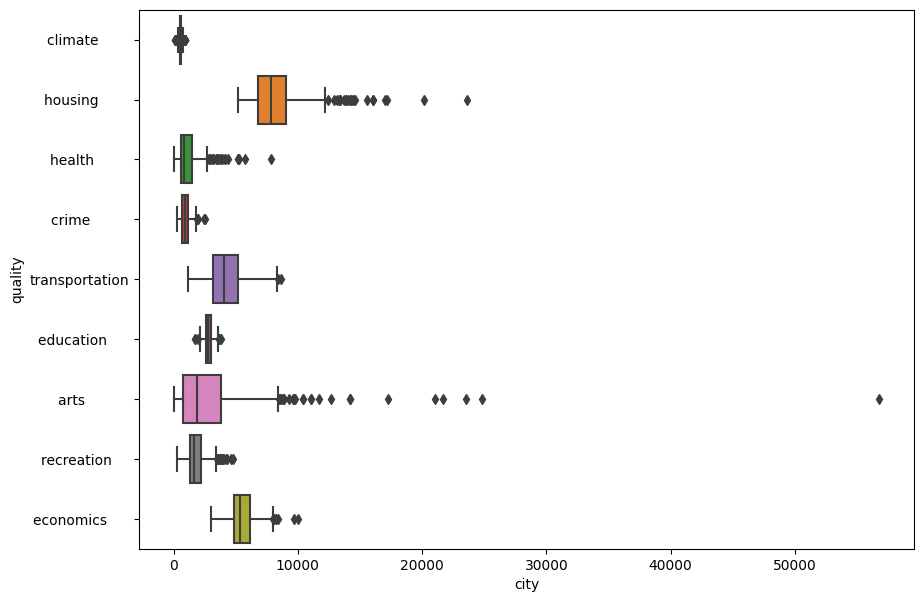

In [20]:
# draw a boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df,orient='h')
plt.xlabel("city")
plt.ylabel("quality")
plt.show()

In [ ]:
scaler = StandardScaler() # create a StandardScaler object
scaler.fit(df) # fit the StandardScaler object to the data
scaler_df = scaler.transform(df) # transform the data using the fitted StandardScaler object
scaler_df = pd.DataFrame(scaler_df, columns=df.columns) # create a DataFrame from the transformed data

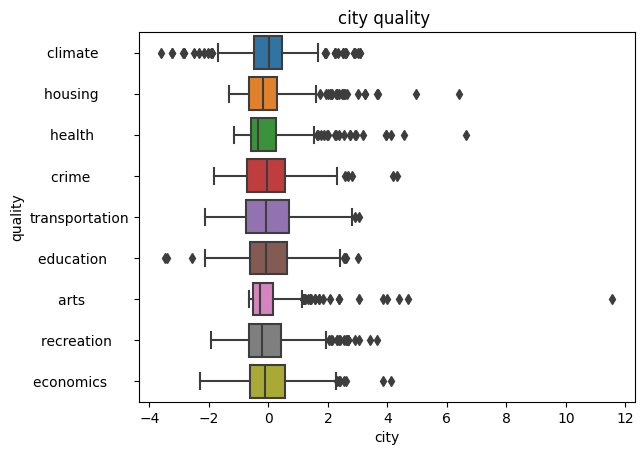

In [24]:
scaler_df.head()
sns.boxplot(data=scaler_df,orient='h')
plt.title("city quality ")
plt.xlabel("city")
plt.ylabel("quality")
plt.show()